<a href="https://colab.research.google.com/github/LES4975/Computer_Engineering_Assignments/blob/main/Artificial-Intelligence-%20Homework3_MNIST_Backpropagation_3_layer_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [ ]:
#Import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

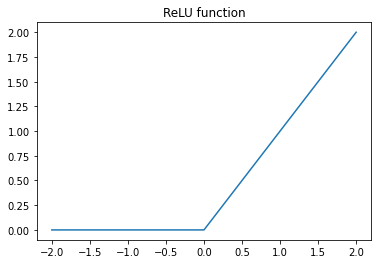

In [ ]:
relu = nn.ReLU()
x_np = np.arange(-2, 2.1, 0.25)
x = torch.tensor(x_np).float()
y = relu(x)

plt.plot(x.data, y.data)
plt.title('ReLU function')
plt.show()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
data_root = './data'

train_set0 = datasets.MNIST(
    # Specify the directory where you want to download the source data
    root = data_root,
    # Training data or validation data
    train = True,
    download = True)

#print length of train_set0
print(len(train_set0))

# Import first element of dataset
image, label = train_set0[0]

# Check data type
print('insert data type : ', type(image))
print('answer data type : ', type(label))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

60000
insert data type :  <class 'PIL.Image.Image'>
answer data type :  <class 'int'>


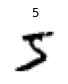

In [ ]:
# Output input data to image

plt.figure(figsize=(1,1))
plt.title(f'{label}')
plt.imshow(image, cmap='gray_r')
plt.axis('off')
plt.show()

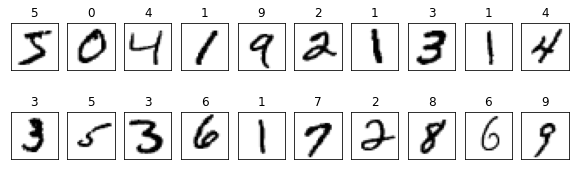

In [ ]:
# Outputs the first 20 data as images with correct data(label)

plt.figure(figsize=(10, 3))
for i in range(20):
    ax = plt.subplot(2, 10, i + 1)

    image, label = train_set0[i]

    plt.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Transforms is a function for data conversion

transform = transforms.Compose([
    # Convert data to tensor
    transforms.ToTensor(),

    # Data Normalization
    transforms.Normalize(0.5, 0.5),

    # Convert to 1D tensor
    transforms.Lambda(lambda x: x.view(-1)),
])

In [ ]:
# Dataset function for data downloading

# Download training dataset
train_set = datasets.MNIST(
    root = data_root, train = True,
    download = True, transform = transform)

# Download testing(validation) dataset
test_set = datasets.MNIST(
    root = data_root, train = False,
    download = True, transform = transform)

In [ ]:
# use 80% for training and 20% for testing (validation).
#So, let's reform the dataset according to the conditions.

training_set = train_set

#Split 4000 examples of data from the training_set.
from torch.utils.data import random_split

training_set, splited_dataset = random_split(training_set, [56000, 4000])
#Check the length of training_set
print(len(training_set))
print(len(splited_dataset))

56000
4000


In [ ]:
#Concatenate datasets for testing
from torch.utils.data import ConcatDataset

testing_set = ConcatDataset([splited_dataset, test_set])
#Check the length of testing_set
print(len(testing_set))

14000


In [ ]:
# Import a library of dataloader
from torch.utils.data import DataLoader

# Mini batch size
batch_size = 280

# Training dataloader
train_loader = DataLoader(
    training_set, batch_size = batch_size,
    shuffle = True)

# Testing dataloader
# Shuffle not required for validation
test_loader = DataLoader(
    testing_set,  batch_size = batch_size,
    shuffle = False)

In [ ]:
# Print the number of group
print(len(train_loader))

# Import the first set from the train_loader
for images, labels in train_loader:
    break

print(images.shape)
print(labels.shape)

200
torch.Size([280, 784])
torch.Size([280])


In [ ]:
#Define n_input, n_output, n_hidden
n_input = 784

# The number of classification : 10
n_output = len(set(list(labels.data.numpy())))

n_hidden = 128

print(f'n_input: {n_input}  n_hidden: {n_hidden} n_output: {n_output}')

n_input: 784  n_hidden: 128 n_output: 10


In [ ]:
# Define the 3-layer neural network model class
# A Neural Network Model of 784 Input 10 Output 1 Hidden Layer

class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        # Hidden Layer
        self.l1 = nn.Linear(n_input, n_hidden)

        # Output Layer
        self.l2 = nn.Linear(n_hidden, n_output)

        # ReLU function
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3

In [ ]:
# Creating a model
net = Net(n_input, n_output, n_hidden)

# Send model to GPU
net = net.to(device)

In [ ]:
print(net)
summary(net, (784,))

Net(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [10]                      --
├─Linear: 1-1                            [128]                     100,480
├─ReLU: 1-2                              [128]                     --
├─Linear: 1-3                            [10]                      1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (M): 12.87
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.41
Estimated Total Size (MB): 0.41

In [ ]:
#Fix the random number
torch.manual_seed(123)
torch.cuda.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True

#learning rate
lr = 0.01

# Initialize the model, net
net = Net(n_input, n_output, n_hidden).to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=lr)

# The number of epoch
num_epochs = 100

# Save result of training to history array
history = np.zeros((0,5))

In [ ]:
from tqdm.notebook import tqdm

# Start training and testing
for epoch in range(num_epochs):
    train_acc, train_loss = 0, 0
    val_acc, val_loss = 0, 0
    n_train, n_test = 0, 0

    # Training phase
    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        # Send to GPU
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Initialize gradients
        optimizer.zero_grad()

        # Calculate the prediction
        outputs = net(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Calculate the gradient
        loss.backward()

        # Modify parameters
        optimizer.step()

        # Calculate a prediction label
        predicted = torch.max(outputs, 1)[1]

        # Calculate loss and accuracy
        train_loss += loss.item()
        train_acc += (predicted == labels).sum().item()

        # Testing phase
    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)


        # Calculate the prediction
        outputs_test = net(inputs_test)

        # Calculate the loss
        loss_test = criterion(outputs_test, labels_test)

        # Calculate a prediction label
        predicted_test = torch.max(outputs_test, 1)[1]

        # Calculate loss and accurancy
        val_loss +=  loss_test.item()
        val_acc +=  (predicted_test == labels_test).sum().item()

    # Print results and record them
    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history = np.vstack((history, item))


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/100], loss: 1.54501 acc: 0.65561 val_loss: 0.92001, val_acc: 0.81557


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [2/100], loss: 0.72130 acc: 0.83955 val_loss: 0.57027, val_acc: 0.85993


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [3/100], loss: 0.52517 acc: 0.86679 val_loss: 0.46365, val_acc: 0.87750


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [4/100], loss: 0.45003 acc: 0.88000 val_loss: 0.41224, val_acc: 0.88686


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [5/100], loss: 0.41028 acc: 0.88687 val_loss: 0.38154, val_acc: 0.89300


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [6/100], loss: 0.38461 acc: 0.89212 val_loss: 0.35968, val_acc: 0.89800


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [7/100], loss: 0.36667 acc: 0.89589 val_loss: 0.34642, val_acc: 0.90121


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [8/100], loss: 0.35319 acc: 0.89877 val_loss: 0.33350, val_acc: 0.90393


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [9/100], loss: 0.34232 acc: 0.90207 val_loss: 0.32502, val_acc: 0.90629


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [10/100], loss: 0.33318 acc: 0.90479 val_loss: 0.31746, val_acc: 0.90864


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [11/100], loss: 0.32550 acc: 0.90682 val_loss: 0.31073, val_acc: 0.90929


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [12/100], loss: 0.31860 acc: 0.90845 val_loss: 0.30472, val_acc: 0.91271


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [13/100], loss: 0.31249 acc: 0.90989 val_loss: 0.30036, val_acc: 0.91350


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [14/100], loss: 0.30641 acc: 0.91170 val_loss: 0.29652, val_acc: 0.91350


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [15/100], loss: 0.30140 acc: 0.91373 val_loss: 0.28985, val_acc: 0.91686


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [16/100], loss: 0.29644 acc: 0.91452 val_loss: 0.28574, val_acc: 0.91814


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [17/100], loss: 0.29167 acc: 0.91607 val_loss: 0.28267, val_acc: 0.91857


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [18/100], loss: 0.28708 acc: 0.91793 val_loss: 0.27866, val_acc: 0.92000


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [19/100], loss: 0.28284 acc: 0.91963 val_loss: 0.27454, val_acc: 0.92050


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [20/100], loss: 0.27862 acc: 0.92066 val_loss: 0.27192, val_acc: 0.92214


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [21/100], loss: 0.27452 acc: 0.92237 val_loss: 0.26761, val_acc: 0.92257


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [22/100], loss: 0.27069 acc: 0.92259 val_loss: 0.26427, val_acc: 0.92379


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [23/100], loss: 0.26683 acc: 0.92400 val_loss: 0.26061, val_acc: 0.92479


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [24/100], loss: 0.26304 acc: 0.92512 val_loss: 0.25850, val_acc: 0.92507


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [25/100], loss: 0.25935 acc: 0.92575 val_loss: 0.25493, val_acc: 0.92664


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [26/100], loss: 0.25580 acc: 0.92712 val_loss: 0.25077, val_acc: 0.92786


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [27/100], loss: 0.25222 acc: 0.92830 val_loss: 0.24806, val_acc: 0.92893


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [28/100], loss: 0.24860 acc: 0.92993 val_loss: 0.24591, val_acc: 0.92971


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [29/100], loss: 0.24535 acc: 0.93021 val_loss: 0.24224, val_acc: 0.93007


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [30/100], loss: 0.24199 acc: 0.93111 val_loss: 0.23905, val_acc: 0.93143


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [31/100], loss: 0.23866 acc: 0.93207 val_loss: 0.23649, val_acc: 0.93221


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [32/100], loss: 0.23514 acc: 0.93354 val_loss: 0.23372, val_acc: 0.93343


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [33/100], loss: 0.23197 acc: 0.93464 val_loss: 0.23000, val_acc: 0.93357


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [34/100], loss: 0.22886 acc: 0.93509 val_loss: 0.22777, val_acc: 0.93450


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [35/100], loss: 0.22576 acc: 0.93571 val_loss: 0.22471, val_acc: 0.93614


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [36/100], loss: 0.22252 acc: 0.93675 val_loss: 0.22155, val_acc: 0.93607


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [37/100], loss: 0.21951 acc: 0.93791 val_loss: 0.21917, val_acc: 0.93707


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [38/100], loss: 0.21681 acc: 0.93896 val_loss: 0.21746, val_acc: 0.93771


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [39/100], loss: 0.21375 acc: 0.93989 val_loss: 0.21378, val_acc: 0.93771


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [40/100], loss: 0.21105 acc: 0.94039 val_loss: 0.21356, val_acc: 0.93850


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [41/100], loss: 0.20827 acc: 0.94098 val_loss: 0.20953, val_acc: 0.93900


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [42/100], loss: 0.20564 acc: 0.94237 val_loss: 0.20678, val_acc: 0.94114


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [43/100], loss: 0.20294 acc: 0.94264 val_loss: 0.20404, val_acc: 0.94179


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [44/100], loss: 0.20050 acc: 0.94363 val_loss: 0.20195, val_acc: 0.94157


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [45/100], loss: 0.19782 acc: 0.94436 val_loss: 0.20012, val_acc: 0.94236


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [46/100], loss: 0.19533 acc: 0.94486 val_loss: 0.19895, val_acc: 0.94207


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [47/100], loss: 0.19290 acc: 0.94595 val_loss: 0.19655, val_acc: 0.94321


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [48/100], loss: 0.19057 acc: 0.94655 val_loss: 0.19451, val_acc: 0.94429


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [49/100], loss: 0.18822 acc: 0.94711 val_loss: 0.19260, val_acc: 0.94314


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [50/100], loss: 0.18608 acc: 0.94818 val_loss: 0.18961, val_acc: 0.94550


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [51/100], loss: 0.18397 acc: 0.94846 val_loss: 0.18732, val_acc: 0.94607


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [52/100], loss: 0.18179 acc: 0.94888 val_loss: 0.18551, val_acc: 0.94679


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [53/100], loss: 0.17955 acc: 0.94991 val_loss: 0.18396, val_acc: 0.94693


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [54/100], loss: 0.17739 acc: 0.95050 val_loss: 0.18211, val_acc: 0.94707


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [55/100], loss: 0.17562 acc: 0.95098 val_loss: 0.18075, val_acc: 0.94650


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [56/100], loss: 0.17356 acc: 0.95112 val_loss: 0.17937, val_acc: 0.94764


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [57/100], loss: 0.17149 acc: 0.95221 val_loss: 0.17707, val_acc: 0.94800


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [58/100], loss: 0.16964 acc: 0.95295 val_loss: 0.17576, val_acc: 0.94786


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [59/100], loss: 0.16772 acc: 0.95337 val_loss: 0.17338, val_acc: 0.94929


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [60/100], loss: 0.16595 acc: 0.95388 val_loss: 0.17345, val_acc: 0.94886


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [61/100], loss: 0.16411 acc: 0.95439 val_loss: 0.17119, val_acc: 0.94900


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [62/100], loss: 0.16242 acc: 0.95468 val_loss: 0.16916, val_acc: 0.95014


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [63/100], loss: 0.16080 acc: 0.95527 val_loss: 0.16801, val_acc: 0.95007


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [64/100], loss: 0.15905 acc: 0.95557 val_loss: 0.16627, val_acc: 0.95093


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [65/100], loss: 0.15729 acc: 0.95584 val_loss: 0.16490, val_acc: 0.95150


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [66/100], loss: 0.15570 acc: 0.95646 val_loss: 0.16527, val_acc: 0.95129


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [67/100], loss: 0.15423 acc: 0.95696 val_loss: 0.16208, val_acc: 0.95171


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [68/100], loss: 0.15265 acc: 0.95684 val_loss: 0.16040, val_acc: 0.95257


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [69/100], loss: 0.15102 acc: 0.95750 val_loss: 0.15910, val_acc: 0.95243


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [70/100], loss: 0.14957 acc: 0.95782 val_loss: 0.15823, val_acc: 0.95314


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [71/100], loss: 0.14799 acc: 0.95813 val_loss: 0.15733, val_acc: 0.95379


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [72/100], loss: 0.14663 acc: 0.95889 val_loss: 0.15591, val_acc: 0.95379


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [73/100], loss: 0.14520 acc: 0.95913 val_loss: 0.15521, val_acc: 0.95371


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [74/100], loss: 0.14381 acc: 0.95995 val_loss: 0.15399, val_acc: 0.95414


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [75/100], loss: 0.14243 acc: 0.95989 val_loss: 0.15269, val_acc: 0.95429


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [76/100], loss: 0.14121 acc: 0.96005 val_loss: 0.15100, val_acc: 0.95471


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [77/100], loss: 0.13977 acc: 0.96066 val_loss: 0.14997, val_acc: 0.95507


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [78/100], loss: 0.13850 acc: 0.96104 val_loss: 0.14860, val_acc: 0.95536


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [79/100], loss: 0.13724 acc: 0.96171 val_loss: 0.14856, val_acc: 0.95543


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [80/100], loss: 0.13598 acc: 0.96150 val_loss: 0.14703, val_acc: 0.95586


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [81/100], loss: 0.13461 acc: 0.96170 val_loss: 0.14591, val_acc: 0.95621


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [82/100], loss: 0.13346 acc: 0.96221 val_loss: 0.14539, val_acc: 0.95693


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [83/100], loss: 0.13223 acc: 0.96259 val_loss: 0.14428, val_acc: 0.95686


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [84/100], loss: 0.13116 acc: 0.96305 val_loss: 0.14299, val_acc: 0.95743


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [85/100], loss: 0.13001 acc: 0.96348 val_loss: 0.14247, val_acc: 0.95721


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [86/100], loss: 0.12878 acc: 0.96391 val_loss: 0.14227, val_acc: 0.95750


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [87/100], loss: 0.12770 acc: 0.96470 val_loss: 0.14047, val_acc: 0.95886


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [88/100], loss: 0.12664 acc: 0.96452 val_loss: 0.13931, val_acc: 0.95850


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [89/100], loss: 0.12549 acc: 0.96457 val_loss: 0.13826, val_acc: 0.95914


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [90/100], loss: 0.12444 acc: 0.96543 val_loss: 0.13749, val_acc: 0.95943


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [91/100], loss: 0.12329 acc: 0.96555 val_loss: 0.13727, val_acc: 0.95871


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [92/100], loss: 0.12216 acc: 0.96604 val_loss: 0.13612, val_acc: 0.95886


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [93/100], loss: 0.12131 acc: 0.96618 val_loss: 0.13577, val_acc: 0.95957


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [94/100], loss: 0.12033 acc: 0.96629 val_loss: 0.13409, val_acc: 0.96007


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [95/100], loss: 0.11932 acc: 0.96714 val_loss: 0.13336, val_acc: 0.95979


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [96/100], loss: 0.11837 acc: 0.96670 val_loss: 0.13300, val_acc: 0.96036


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [97/100], loss: 0.11733 acc: 0.96705 val_loss: 0.13203, val_acc: 0.96057


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [98/100], loss: 0.11629 acc: 0.96739 val_loss: 0.13152, val_acc: 0.96129


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [99/100], loss: 0.11557 acc: 0.96782 val_loss: 0.13071, val_acc: 0.96150


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [100/100], loss: 0.11451 acc: 0.96800 val_loss: 0.13022, val_acc: 0.96129


In [ ]:
# Check loss and accurancy

print(f'Initial state - Loss : {history[0,3]:.5f}  Accuracy : {history[0,4]:.5f}' )
print(f'Final state - Loss : {history[-1,3]:.5f}  Accuracy : {history[-1,4]:.5f}' )

Initial state - Loss : 0.92001  Accuracy : 0.81557
Final state - Loss : 0.13022  Accuracy : 0.96129


In [ ]:
print(f'Test accuracy: {val_acc*100:.4f}%')

Test accuracy: 96.1286%


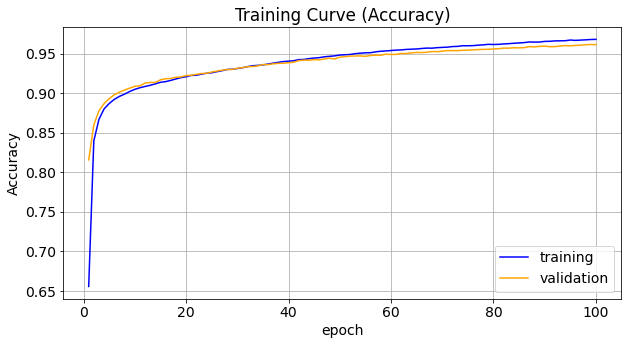

In [ ]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.unicode_minus'] = False
np.set_printoptions(suppress=True, precision=4)

#Visualize this result to Accurancy of the training and testing progress.
plt.plot(history[:,0], history[:,2], c='blue', label='training')
plt.plot(history[:,0], history[:,4], c='orange', label='validation')
# plt.ylim(0.82, 1.00)
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Training Curve (Accuracy)')
plt.legend(loc= 'lower right')
plt.show()

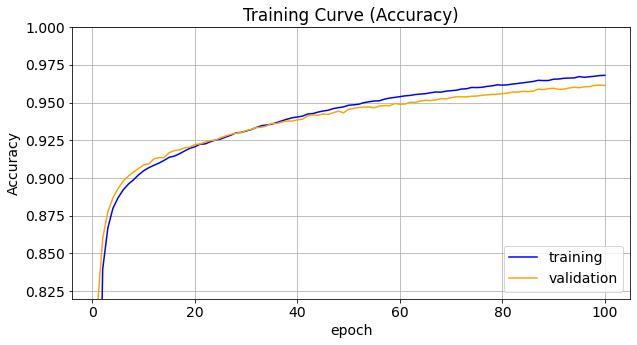

In [ ]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.unicode_minus'] = False
np.set_printoptions(suppress=True, precision=4)

#Visualize this result to Accurancy of the training and testing progress.
plt.plot(history[:,0], history[:,2], c='blue', label='training')
plt.plot(history[:,0], history[:,4], c='orange', label='validation')
plt.ylim(0.82, 1.00)
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Training Curve (Accuracy)')
plt.legend(loc= 'lower right')
plt.show()